In [226]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

In [246]:
PATH = "drug200.csv"
COLUMNS_FOR_FACTORISATION = ["BP", "Cholesterol", "Sex", "Drug"]

dataset = pd.read_csv(PATH)
factorization_table = {}

dataset_factorized = dataset.copy()

for column in dataset.columns:
    if column in COLUMNS_FOR_FACTORISATION:
        dataset_factorized[column], table = pd.factorize(dataset[column])
        # print(dataset[column].unique())
        factorization_table[column] = pd.DataFrame(
            columns=[column],
            data=table
        )

dataset.head(5)

dataset = dataset_factorized

<Axes: >

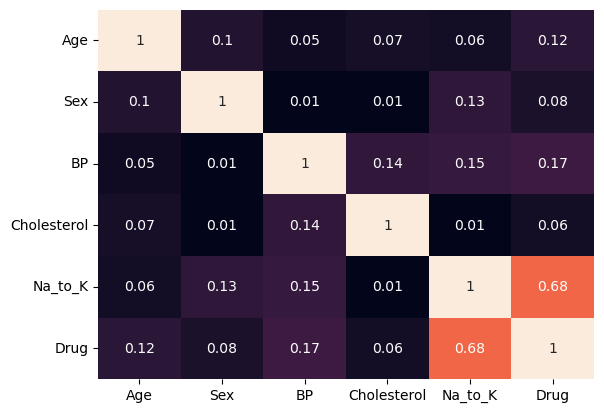

In [248]:
sns.heatmap(round(abs(dataset_factorized.corr()), 2,), annot=True, cbar=False)

In [250]:
target = "Drug"

train_input, test_input, train_output, test_output = train_test_split(
 dataset.drop(target, axis=1),
 dataset[target],
 test_size=0.2
)

In [252]:
model_entropy = tree.DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(train_input, train_output)
predictions_entropy = model_entropy.predict(test_input)

model_gini = tree.DecisionTreeClassifier(criterion="gini")
model_gini.fit(train_input, train_output)
predictions_gini = model_gini.predict(test_input)

Text(0.5, 1.0, 'Матрица сходства (Джини)')

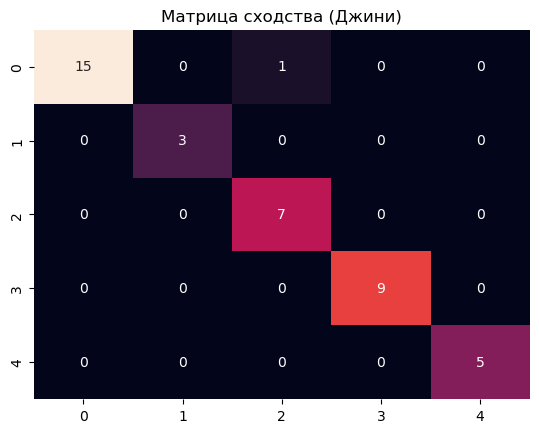

In [254]:
confusion_matrix = sklearn.metrics.confusion_matrix(predictions_gini, test_output)
sns.heatmap(confusion_matrix, annot=True, cbar=False)
plt.title('Матрица сходства (Джини)')

Text(0.5, 1.0, 'Матрица сходства (энтропия)')

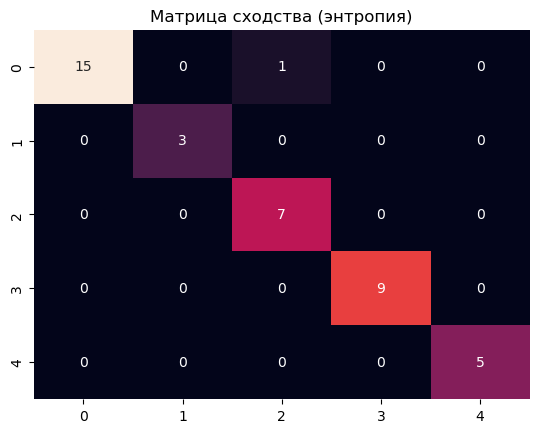

In [256]:
confusion_matrix_entropy = sklearn.metrics.confusion_matrix(predictions_entropy, test_output)
sns.heatmap(confusion_matrix_entropy, annot=True, cbar=False)
plt.title('Матрица сходства (энтропия)')

In [258]:
drugs = factorization_table[target].values
drugs = np.squeeze(drugs)

# print(factorization_table["Drug"])

Text(0.5, 1.0, 'Дерево решений (Энтропия)')

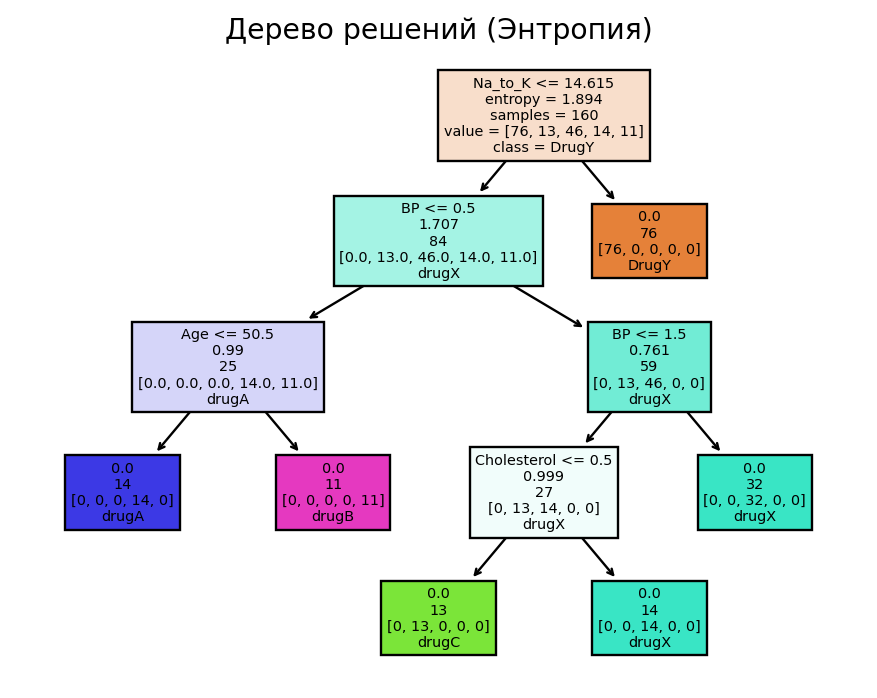

In [260]:
plt.figure(dpi=170)
tree.plot_tree(model_entropy, filled=True, label="root", feature_names=dataset.columns, class_names=drugs)
plt.title("Дерево решений (Энтропия)")

Text(0.5, 1.0, 'Дерево решений (Джини)')

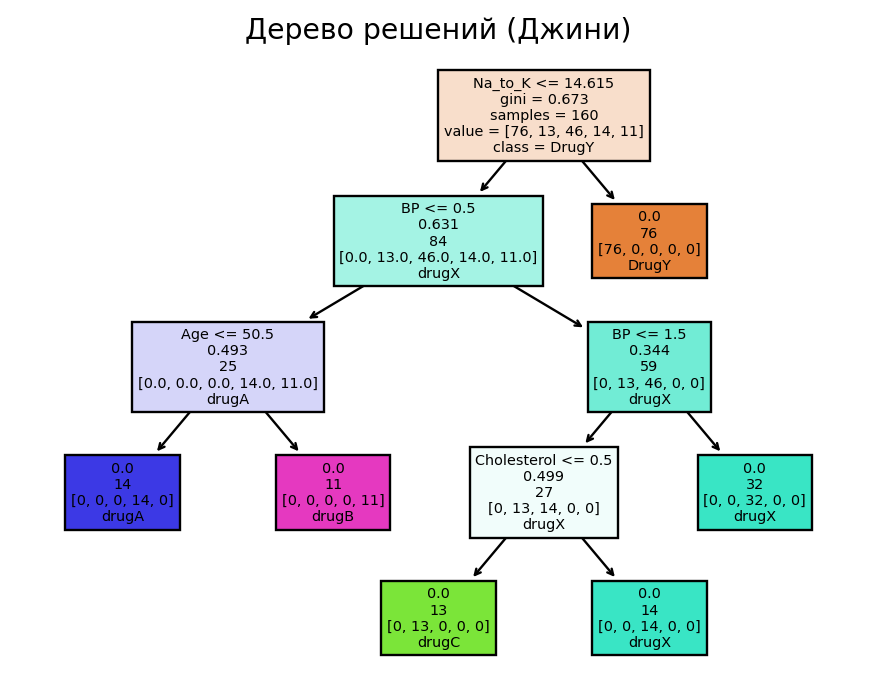

In [262]:
plt.figure(dpi=170)
tree.plot_tree(model_gini, filled=True, label="root", feature_names=dataset.columns, class_names=drugs)
plt.title("Дерево решений (Джини)")